In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crash = pd.read_csv('./data/Crashes_in_DC.csv')

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crash.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR
0,-77.019666,38.951708,15657174,26624621,10058004,2010-04-30T05:00:00.000Z,1.10005e+07,4380.281,0.0,12560.0,...,0,0,0.0,0.0,0.0,11039062,GALLATIN ST NW,42.257043,South,NaN
1,-77.019899,38.971816,15657175,26623663,11055447,2011-04-23T05:00:00.000Z,1.10005e+07,6613.246,0.0,2801.0,...,0,0,0.0,0.0,0.0,11011572,ASPEN ST NW,59.400987,South,NaN
2,-77.018930,38.902528,15657176,26620620,12035156,2012-03-13T05:00:00.000Z,1.10005e+07,856.793,0.0,5717.0,...,0,0,0.0,0.0,0.0,11050892,K ST NW,0.034404,South,NaN
3,-77.018931,38.905480,15657177,26620125,11041528,2011-03-28T05:00:00.000Z,1.10005e+07,1184.453,0.0,6624.0,...,0,0,0.0,0.0,0.0,11057852,M ST NW,19.022755,South,NaN
4,-77.018931,38.905480,15657178,26620418,12035545,2012-03-14T05:00:00.000Z,1.10005e+07,1184.453,0.0,6624.0,...,0,0,0.0,0.0,0.0,11057852,M ST NW,23.776800,South,NaN


In [4]:
crash.columns

Index([u'X', u'Y', u'OBJECTID', u'CRIMEID', u'CCN', u'REPORTDATE', u'ROUTEID',
       u'MEASURE', u'OFFSET', u'STREETSEGID', u'ROADWAYSEGID', u'FROMDATE',
       u'TODATE', u'MARID', u'ADDRESS', u'LATITUDE', u'LONGITUDE', u'XCOORD',
       u'YCOORD', u'WARD', u'EVENTID', u'MAR_ADDRESS', u'MAR_SCORE',
       u'MAJORINJURIES_BICYCLIST', u'MINORINJURIES_BICYCLIST',
       u'UNKNOWNINJURIES_BICYCLIST', u'FATAL_BICYCLIST',
       u'MAJORINJURIES_DRIVER', u'MINORINJURIES_DRIVER',
       u'UNKNOWNINJURIES_DRIVER', u'FATAL_DRIVER', u'MAJORINJURIES_PEDESTRIAN',
       u'MINORINJURIES_PEDESTRIAN', u'UNKNOWNINJURIES_PEDESTRIAN',
       u'FATAL_PEDESTRIAN', u'TOTAL_VEHICLES', u'TOTAL_BICYCLES',
       u'TOTAL_PEDESTRIANS', u'PEDESTRIANSIMPAIRED', u'BICYCLISTSIMPAIRED',
       u'DRIVERSIMPAIRED', u'TOTAL_TAXIS', u'TOTAL_GOVERNMENT',
       u'SPEEDING_INVOLVED', u'NEARESTINTROUTEID', u'NEARESTINTSTREETNAME',
       u'OFFINTERSECTION', u'INTAPPROACHDIRECTION', u'LOCERROR'],
      dtype='object')

In [5]:
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

In [6]:
ts = crash.set_index('REPORTDATE')

In [7]:
ts.sort_index()['MINORINJURIES_BICYCLIST'].groupby(ts.index.day)

In [8]:
ts.groupby(ts.index.year).sum()['MINORINJURIES_BICYCLIST']

1975.0      0.0
1989.0      0.0
1990.0      0.0
1991.0      0.0
1992.0      0.0
1993.0      0.0
1994.0      0.0
1995.0      0.0
1996.0      0.0
1997.0      0.0
1998.0      0.0
1999.0      0.0
2000.0      0.0
2001.0      0.0
2002.0      0.0
2003.0      0.0
2004.0      0.0
2005.0      0.0
2006.0      0.0
2007.0      0.0
2008.0      0.0
2009.0      0.0
2010.0      0.0
2011.0      0.0
2012.0      0.0
2013.0      0.0
2014.0      0.0
2015.0    101.0
2016.0    431.0
2017.0    182.0
2025.0      0.0
Name: MINORINJURIES_BICYCLIST, dtype: float64

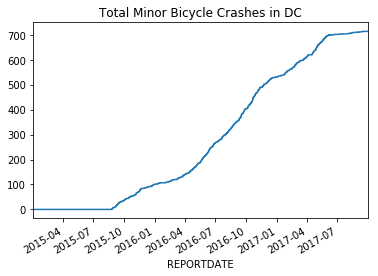

In [9]:
ts.sort_index()['MINORINJURIES_BICYCLIST'].drop('NaT')['2015':'2017'].cumsum().plot(title='Total Minor Bicycle Crashes in DC')


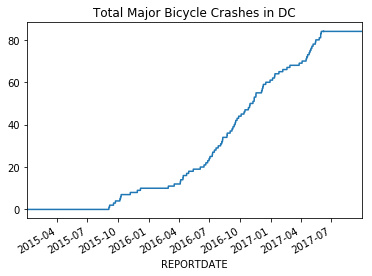

In [10]:
# major accidents
ts.sort_index()['MAJORINJURIES_BICYCLIST'].drop('NaT')['2015':'2017'].cumsum().plot(title='Total Major Bicycle Crashes in DC')


In [11]:
# major accidents?
crash[crash['MAJORINJURIES_BICYCLIST'] > 0].shape[0]

85

In [12]:
crash[crash['MINORINJURIES_BICYCLIST'] > 0].shape[0]

710

In [13]:
crash[crash['BICYCLISTSIMPAIRED'] > 0].shape[0]

10

In [14]:
crash[crash['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

array([[-77.01892776,  38.91246754],
       [-77.01989787,  38.97223571],
       [-77.01893065,  38.91472173],
       ..., 
       [         nan,          nan],
       [-77.03273451,  38.93053417],
       [-77.03216749,  38.94393463]])

In [15]:
bike_data = crash[crash['MINORINJURIES_BICYCLIST'] > 0]

In [16]:
crash[crash['MINORINJURIES_BICYCLIST'] > 0].isnull().sum()

X                               1
Y                               1
OBJECTID                        0
CRIMEID                         0
CCN                             0
REPORTDATE                      0
ROUTEID                         1
MEASURE                         1
OFFSET                          1
STREETSEGID                     1
ROADWAYSEGID                    1
FROMDATE                        0
TODATE                        710
MARID                           0
ADDRESS                         0
LATITUDE                        0
LONGITUDE                       0
XCOORD                          0
YCOORD                          0
WARD                            0
EVENTID                         0
MAR_ADDRESS                    36
MAR_SCORE                       0
MAJORINJURIES_BICYCLIST         0
MINORINJURIES_BICYCLIST         0
UNKNOWNINJURIES_BICYCLIST       0
FATAL_BICYCLIST                 0
MAJORINJURIES_DRIVER            0
MINORINJURIES_DRIVER            0
UNKNOWNINJURIE

In [17]:
# show that null value
crash[crash['MINORINJURIES_BICYCLIST'] > 0][crash[crash['MINORINJURIES_BICYCLIST'] > 0].isnull()['X'] == True]

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR
139823,NaN,NaN,15794925,27348662,17106978,2017-06-23 16:44:20,NaN,NaN,NaN,NaN,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [18]:
# drop that null value
data = crash[crash['MINORINJURIES_BICYCLIST'] > 0].drop(139823)[['X', 'Y']].values

In [19]:
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

In [20]:
# add to map one-by-one
for i in range(0,len(data)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='red'),
                  
                 ).add_to(m)

In [21]:
m

In [22]:
ts[:'2017'][ts[:'2017']['MINORINJURIES_BICYCLIST'] > 0]

,X,Y,OBJECTID,CRIMEID,CCN,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR
REPORTDATE,,,,,,,,,,,,,,,,,,,,,
2016-08-30 15:21:37,-77.018928,38.912468,15657369,27049602,16146045,1.10005e+07,1960.169,0.0,11534.0,20471.0,...,0,0,0.0,1.0,0.0,11074162,R ST NW,22.352832,South,NaN
2016-10-19 13:35:36,-77.019898,38.972236,15657376,27099523,16177665,1.10005e+07,6659.880,0.0,2801.0,3378.0,...,0,0,0.0,0.0,0.0,11011572,ASPEN ST NW,13.003048,South,NaN
2016-12-17 10:47:15,-77.018931,38.914722,15657385,27158543,16212655,1.10005e+07,2210.410,0.0,6120.0,14538.0,...,1,0,0.0,0.0,0.0,11036722,FLORIDA AVE NW,28.246378,West,NaN
2017-05-17 17:57:03,-77.018928,38.908945,15657433,27311813,17082537,1.10005e+07,1569.110,62.0,491.0,868.0,...,0,0,0.0,0.0,0.0,11065842,O ST NW,44.506757,North,NaN
2017-05-08 03:12:14,-77.019728,38.953072,15657494,27301912,17076210,1.10005e+07,4531.766,4.0,12279.0,12581.0,...,0,0,0.0,0.0,0.0,11042902,HAMILTON ST NW,7.974331,South,NaN
2016-01-09 13:57:38,-77.019903,38.913043,15657600,26815579,16004595,1.10006e+07,2326.843,0.0,8948.0,9498.0,...,0,0,0.0,0.0,0.0,11075462,RHODE ISLAND AVE NW,0.044531,North,NaN
2016-09-16 21:16:33,-77.017702,38.918274,15656794,27066763,16157142,1.10004e+07,2688.946,0.0,9566.0,10283.0,...,0,0,0.0,0.0,0.0,11088462,V ST NW,12.464699,South,NaN
2016-02-22 23:04:48,-77.018931,38.902921,15657125,26859794,16027144,1.10005e+07,900.379,5.0,4323.0,35837.0,...,0,0,0.0,0.0,0.0,11050892,K ST NW,43.635916,North,NaN
2015-11-28 11:39:14,-77.019202,38.942060,15657142,26773572,15189434,1.10005e+07,3431.134,0.0,5877.0,3057.0,...,0,0,0.0,0.0,0.0,11088012,UPSHUR ST NW,0.049594,North,NaN


In [23]:
data16 = ts['2016'][ts['2016']['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [24]:
data17 = ts['2017':][ts['2017':]['MINORINJURIES_BICYCLIST'] > 0].drop(139823)[['X', 'Y']].values

In [25]:
len(data16)

430

In [26]:
len(data17)

182

In [27]:
crash1617 = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

In [28]:
# add to map one-by-one
for i in range(0,len(data16)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='blue'),
                  popup='2016',
                 ).add_to(crash1617)

In [29]:
# add to map one-by-one
for i in range(0,len(data17)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='red'),
                  popup='2017',
                 ).add_to(crash1617)

In [30]:
crash1617

In [31]:
crash1617.save('./maps/bicycle-16-17-crashes.html')

In [33]:
for x in crash.columns:
    print x

X
Y
OBJECTID
CRIMEID
CCN
REPORTDATE
ROUTEID
MEASURE
OFFSET
STREETSEGID
ROADWAYSEGID
FROMDATE
TODATE
MARID
ADDRESS
LATITUDE
LONGITUDE
XCOORD
YCOORD
WARD
EVENTID
MAR_ADDRESS
MAR_SCORE
MAJORINJURIES_BICYCLIST
MINORINJURIES_BICYCLIST
UNKNOWNINJURIES_BICYCLIST
FATAL_BICYCLIST
MAJORINJURIES_DRIVER
MINORINJURIES_DRIVER
UNKNOWNINJURIES_DRIVER
FATAL_DRIVER
MAJORINJURIES_PEDESTRIAN
MINORINJURIES_PEDESTRIAN
UNKNOWNINJURIES_PEDESTRIAN
FATAL_PEDESTRIAN
TOTAL_VEHICLES
TOTAL_BICYCLES
TOTAL_PEDESTRIANS
PEDESTRIANSIMPAIRED
BICYCLISTSIMPAIRED
DRIVERSIMPAIRED
TOTAL_TAXIS
TOTAL_GOVERNMENT
SPEEDING_INVOLVED
NEARESTINTROUTEID
NEARESTINTSTREETNAME
OFFINTERSECTION
INTAPPROACHDIRECTION
LOCERROR


In [ ]:
MAJORINJURIES_BICYCLIST
MINORINJURIES_BICYCLIST
UNKNOWNINJURIES_BICYCLIST
FATAL_BICYCLIST

In [182]:
bike_columns = ['MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST']

In [184]:
crash[bike_columns].sum()

MAJORINJURIES_BICYCLIST       85.0
MINORINJURIES_BICYCLIST      714.0
UNKNOWNINJURIES_BICYCLIST      0.0
FATAL_BICYCLIST                7.0
dtype: float64

In [39]:
bike_crash = crash[(crash['MAJORINJURIES_BICYCLIST'] > 0) | (crash['MINORINJURIES_BICYCLIST'] > 0) | (crash['FATAL_BICYCLIST'] > 0)]

In [40]:
bike_crash.shape

(801, 49)

In [42]:
bike_crash.REPORTDATE

195      2016-08-30 15:21:37
197      2016-09-07 01:36:43
202      2016-10-19 13:35:36
211      2016-12-17 10:47:15
212      2016-12-30 04:21:35
228      2017-05-01 16:55:42
259      2017-05-17 17:57:03
320      2017-05-08 03:12:14
426      2016-01-09 13:57:38
613      2016-09-16 21:16:33
951      2016-02-22 23:04:48
968      2015-11-28 11:39:14
1044     2016-10-28 22:06:17
1069     2016-04-27 12:56:02
1070     2016-03-16 22:49:49
1111     2016-05-31 01:31:04
1121     2016-03-27 22:12:01
1127     2015-09-30 19:42:33
1385     2017-04-26 07:52:39
1548     2017-05-15 00:35:38
2126     2017-05-18 00:19:10
2232     2016-11-03 22:09:58
2456     2016-10-20 14:48:17
2500     2016-10-18 23:21:41
2781     2016-11-24 03:55:26
2948     2017-05-31 00:37:11
2991     2016-05-25 15:44:32
3026     2017-04-21 15:55:10
3049     2015-10-23 05:40:56
3268     2017-03-09 02:47:14
                 ...        
129397   2016-08-24 01:41:22
130236   2016-10-13 00:29:24
130456   2016-03-11 02:54:04
130482   2016-

In [47]:
type(bike_crash.REPORTDATE.ix[195])

pandas.tslib.Timestamp

In [48]:
bike_crash.REPORTDATE.ix[195].weekday()

1

In [49]:
# Monday is 0 and Sunday is 6
def get_weekday(timestamp):
    return timestamp.weekday()

In [50]:
get_weekday(bike_crash.REPORTDATE.ix[195])

1

In [163]:
def get_week_number(timestamp):
    return timestamp.isocalendar()[1]

In [60]:
bike_crash['WEEKDAY'] = bike_crash.apply(lambda row: get_weekday(row['REPORTDATE']), axis=1)

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [164]:
bike_crash['WEEK'] = bike_crash.apply(lambda row: get_week_number(row['REPORTDATE']), axis=1)

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

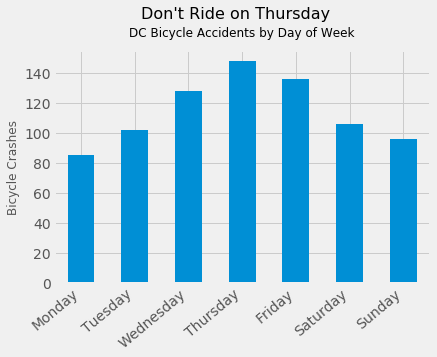

In [148]:
fig, ax = plt.subplots()
bike_crash.groupby([bike_crash.WEEKDAY])['REPORTDATE'].count().plot(kind='bar')
ax.set_xticklabels(x_labels, rotation=40, ha='right')
ax.set_xlabel('')
ax.set_ylabel('Bicycle Crashes', size=12)
plt.suptitle("Don't Ride on Thursday", y=1.03, fontsize=16)
plt.title("DC Bicycle Accidents by Day of Week", y=1.03, size=12)
plt.style.use('fivethirtyeight')
plt.savefig('./img/crashes_day-of_week.png')

In [187]:
bike_crash_ts = bike_crash.set_index('REPORTDATE')

In [188]:
bike_crash_ts.head()

,X,Y,OBJECTID,CRIMEID,CCN,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR,WEEKDAY,WEEK
REPORTDATE,,,,,,,,,,,,,,,,,,,,,
2016-08-30 15:21:37,-77.018928,38.912468,15657369,27049602,16146045,1.10005e+07,1960.169,0.0,11534.0,20471.0,...,0.0,1.0,0.0,11074162,R ST NW,22.352832,South,NaN,1,35
2016-09-07 01:36:43,-77.019918,38.958621,15657371,27056914,16150761,1.10005e+07,5148.377,0.0,11701.0,12076.0,...,0.0,0.0,0.0,11058372,MADISON ST NW,13.219588,South,NaN,2,36
2016-10-19 13:35:36,-77.019898,38.972236,15657376,27099523,16177665,1.10005e+07,6659.880,0.0,2801.0,3378.0,...,0.0,0.0,0.0,11011572,ASPEN ST NW,13.003048,South,NaN,2,42
2016-12-17 10:47:15,-77.018931,38.914722,15657385,27158543,16212655,1.10005e+07,2210.410,0.0,6120.0,14538.0,...,0.0,0.0,0.0,11036722,FLORIDA AVE NW,28.246378,West,NaN,5,50
2016-12-30 04:21:35,-77.018931,38.902449,15657386,27170986,16219583,1.10005e+07,847.954,23.0,5717.0,6257.0,...,0.0,1.0,0.0,11050892,K ST NW,11.199853,South,NaN,4,52


In [338]:
bike_crash_ts['TOTAL_INCIDENTS'] = bike_crash_ts[bike_columns].groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count().sum(axis=1)

In [339]:
bike_crash_ts[bike_columns].groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count().sum(axis=1)



REPORTDATE
2011-06-04    4
2011-06-05    0
2011-06-06    0
2011-06-07    0
2011-06-08    0
2011-06-09    0
2011-06-10    0
2011-06-11    0
2011-06-12    0
2011-06-13    0
2011-06-14    0
2011-06-15    0
2011-06-16    0
2011-06-17    0
2011-06-18    0
2011-06-19    0
2011-06-20    0
2011-06-21    0
2011-06-22    0
2011-06-23    0
2011-06-24    0
2011-06-25    0
2011-06-26    0
2011-06-27    0
2011-06-28    4
2011-06-29    0
2011-06-30    0
2011-07-01    0
2011-07-02    0
2011-07-03    0
             ..
2017-08-15    0
2017-08-16    0
2017-08-17    8
2017-08-18    0
2017-08-19    0
2017-08-20    0
2017-08-21    0
2017-08-22    0
2017-08-23    0
2017-08-24    0
2017-08-25    0
2017-08-26    0
2017-08-27    0
2017-08-28    0
2017-08-29    4
2017-08-30    0
2017-08-31    0
2017-09-01    0
2017-09-02    0
2017-09-03    0
2017-09-04    0
2017-09-05    4
2017-09-06    0
2017-09-07    0
2017-09-08    0
2017-09-09    0
2017-09-10    0
2017-09-11    0
2017-09-12    4
2017-09-13    4
Freq: D, dtyp

In [353]:
bike_crash_ts.groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count()['TOTAL_INCIDENTS'] = bike_crash_ts[bike_columns].groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count().sum(axis=1)

In [355]:
bike_crash_ts.groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count().TOTAL_INCIDENTS

REPORTDATE
2011-06-04    0
2011-06-05    0
2011-06-06    0
2011-06-07    0
2011-06-08    0
2011-06-09    0
2011-06-10    0
2011-06-11    0
2011-06-12    0
2011-06-13    0
2011-06-14    0
2011-06-15    0
2011-06-16    0
2011-06-17    0
2011-06-18    0
2011-06-19    0
2011-06-20    0
2011-06-21    0
2011-06-22    0
2011-06-23    0
2011-06-24    0
2011-06-25    0
2011-06-26    0
2011-06-27    0
2011-06-28    0
2011-06-29    0
2011-06-30    0
2011-07-01    0
2011-07-02    0
2011-07-03    0
             ..
2017-08-15    0
2017-08-16    0
2017-08-17    0
2017-08-18    0
2017-08-19    0
2017-08-20    0
2017-08-21    0
2017-08-22    0
2017-08-23    0
2017-08-24    0
2017-08-25    0
2017-08-26    0
2017-08-27    0
2017-08-28    0
2017-08-29    0
2017-08-30    0
2017-08-31    0
2017-09-01    0
2017-09-02    0
2017-09-03    0
2017-09-04    0
2017-09-05    0
2017-09-06    0
2017-09-07    0
2017-09-08    0
2017-09-09    0
2017-09-10    0
2017-09-11    0
2017-09-12    0
2017-09-13    0
Freq: D, Name

In [340]:
bike_crash_ts[bike_columns].groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count().sum(axis=1)



REPORTDATE
2011-06-04    4
2011-06-05    0
2011-06-06    0
2011-06-07    0
2011-06-08    0
2011-06-09    0
2011-06-10    0
2011-06-11    0
2011-06-12    0
2011-06-13    0
2011-06-14    0
2011-06-15    0
2011-06-16    0
2011-06-17    0
2011-06-18    0
2011-06-19    0
2011-06-20    0
2011-06-21    0
2011-06-22    0
2011-06-23    0
2011-06-24    0
2011-06-25    0
2011-06-26    0
2011-06-27    0
2011-06-28    4
2011-06-29    0
2011-06-30    0
2011-07-01    0
2011-07-02    0
2011-07-03    0
             ..
2017-08-15    0
2017-08-16    0
2017-08-17    8
2017-08-18    0
2017-08-19    0
2017-08-20    0
2017-08-21    0
2017-08-22    0
2017-08-23    0
2017-08-24    0
2017-08-25    0
2017-08-26    0
2017-08-27    0
2017-08-28    0
2017-08-29    4
2017-08-30    0
2017-08-31    0
2017-09-01    0
2017-09-02    0
2017-09-03    0
2017-09-04    0
2017-09-05    4
2017-09-06    0
2017-09-07    0
2017-09-08    0
2017-09-09    0
2017-09-10    0
2017-09-11    0
2017-09-12    4
2017-09-13    4
Freq: D, dtyp

In [333]:
gh_df = bike_crash_ts[['WEEK', 'WEEKDAY','TOTAL_INCIDENTS']]
gh_df.head()

,WEEK,WEEKDAY,TOTAL_INCIDENTS
REPORTDATE,,,
2016-08-30 15:21:37,35,1,NaN
2016-09-07 01:36:43,36,2,NaN
2016-10-19 13:35:36,42,2,NaN
2016-12-17 10:47:15,50,5,NaN
2016-12-30 04:21:35,52,4,NaN


In [331]:
bike_crash_ts[bike_crash_ts['TOTAL_INCIDENTS'] > 1]

,X,Y,OBJECTID,CRIMEID,CCN,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCERROR,WEEKDAY,WEEK,TOTAL_INCIDENTS
REPORTDATE,,,,,,,,,,,,,,,,,,,,,


Check for duplicates before pivoting and reshaping

In [249]:
gh_df.index.nunique()

797

In [250]:
len(gh_df.index)

801

In [251]:
gh_df.index[gh_df.index.duplicated() == True]

DatetimeIndex(['2016-06-15 05:42:26', '2017-05-22 16:29:20',
               '2016-06-15 05:42:26', '2016-06-12 16:22:05'],
              dtype='datetime64[ns]', name=u'REPORTDATE', freq=None)

In [252]:
gh_df["2016-06-15 05:42:26"]

,WEEK,WEEKDAY,TOTAL_INCIDENTS
REPORTDATE,,,
2016-06-15 05:42:26,24,2,NaN
2016-06-15 05:42:26,24,2,NaN
2016-06-15 05:42:26,24,2,NaN


In [253]:
gh_df["2017-05-22 16:29:20"]

,WEEK,WEEKDAY,TOTAL_INCIDENTS
REPORTDATE,,,
2017-05-22 16:29:20,21,0,NaN
2017-05-22 16:29:20,21,0,NaN


In [254]:
# drop duplicate reported incidents
gh_df = gh_df[~gh_df.index.duplicated(keep='first')]

In [298]:
# break out 2015, 2016, 2017
gh_df15 = gh_df["2015"]
gh_df16 = gh_df["2016"]
gh_df17 = gh_df["2017"]

In [299]:
gh_df15.WEEKDAY.nunique()

7

In [300]:
gh_df15.index.nunique()

109

In [301]:
len(gh_df15.index)

109

In [303]:
gh_df15.index[gh_df15.index.duplicated()]

DatetimeIndex([], dtype='datetime64[ns]', name=u'REPORTDATE', freq=None)

In [305]:
gh_df15.unstack()

                 REPORTDATE         
WEEK             2015-11-28 11:39:14    48.0
                 2015-09-30 19:42:33    40.0
                 2015-10-23 05:40:56    43.0
                 2015-10-19 00:49:42    43.0
                 2015-10-08 23:56:45    41.0
                 2015-11-07 09:54:39    45.0
                 2015-12-24 00:29:41    52.0
                 2015-10-15 15:39:26    42.0
                 2015-09-18 10:00:16    38.0
                 2015-12-07 16:33:56    50.0
                 2015-11-05 06:23:30    45.0
                 2015-11-06 01:17:42    45.0
                 2015-11-14 15:55:47    46.0
                 2015-11-05 14:58:33    45.0
                 2015-11-17 23:13:36    47.0
                 2015-12-10 16:00:43    50.0
                 2015-11-16 21:40:47    47.0
                 2015-09-11 14:45:28    37.0
                 2015-09-10 21:44:23    37.0
                 2015-12-10 02:36:18    50.0
                 2015-09-17 21:12:54    38.0
                 2

In [306]:
gh_df15.columns

Index([u'WEEK', u'WEEKDAY', u'TOTAL_INCIDENTS'], dtype='object')

In [318]:
gh_df15.set_index(['WEEK', 'WEEKDAY']).unstack()

ValueError: Index contains duplicate entries, cannot reshape

In [326]:
gh_df15[['WEEK', 'WEEKDAY']].duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23      True
24     False
25      True
26     False
27      True
28      True
29     False
       ...  
79     False
80      True
81     False
82      True
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90      True
91     False
92     False
93     False
94     False
95      True
96      True
97      True
98      True
99      True
100     True
101    False
102     True
103     True
104    False
105    False
106     True
107     True
108     True
dtype: bool

In [322]:
gh_df15[['WEEK', 'WEEKDAY']][gh_df15[['WEEK', 'WEEKDAY']].duplicated()]

,WEEK,WEEKDAY
13,45,3
19,50,3
23,47,1
25,46,5
27,41,3
28,47,1
35,37,3
38,45,4
45,42,2
52,42,2


In [327]:
gh_df["2015"][['WEEK', 'WEEKDAY', 'TOTAL_INCIDENTS']]

,WEEK,WEEKDAY,TOTAL_INCIDENTS
REPORTDATE,,,
2015-11-28 11:39:14,48,5,NaN
2015-09-30 19:42:33,40,2,NaN
2015-10-23 05:40:56,43,4,NaN
2015-10-19 00:49:42,43,0,NaN
2015-10-08 23:56:45,41,3,NaN
2015-11-07 09:54:39,45,5,NaN
2015-12-24 00:29:41,52,3,NaN
2015-10-15 15:39:26,42,3,NaN
2015-09-18 10:00:16,38,4,NaN


In [313]:
# make indices truly unique
gh_df15.reset_index(inplace=True)

In [314]:
gh_df15

,REPORTDATE,WEEK,WEEKDAY,TOTAL_INCIDENTS
0,2015-11-28 11:39:14,48,5,NaN
1,2015-09-30 19:42:33,40,2,NaN
2,2015-10-23 05:40:56,43,4,NaN
3,2015-10-19 00:49:42,43,0,NaN
4,2015-10-08 23:56:45,41,3,NaN
5,2015-11-07 09:54:39,45,5,NaN
6,2015-12-24 00:29:41,52,3,NaN
7,2015-10-15 15:39:26,42,3,NaN
8,2015-09-18 10:00:16,38,4,NaN
9,2015-12-07 16:33:56,50,0,NaN


RangeIndex(start=0, stop=109, step=1)

Pivot and plot!

In [286]:
gh_df15.pivot(columns="WEEK", index="WEEKDAY", values="TOTAL_INCIDENTS")

ValueError: Index contains duplicate entries, cannot reshape

In [290]:
gh_df15 = gh_df15.pivot_table(columns="WEEK", index="WEEKDAY", values="TOTAL_INCIDENTS")

In [296]:
gh_df15

WEEK,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
WEEKDAY,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
# gh_df = gh_df.pivot(columns="WEEK", index="WEEKDAY", values="TOTAL_INCIDENTS")

ValueError: Index contains duplicate entries, cannot reshape

In [291]:
gh_df15.fillna(0, inplace=True)

In [294]:
gh_df15.head()

WEEK,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
WEEKDAY,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(0, 20)

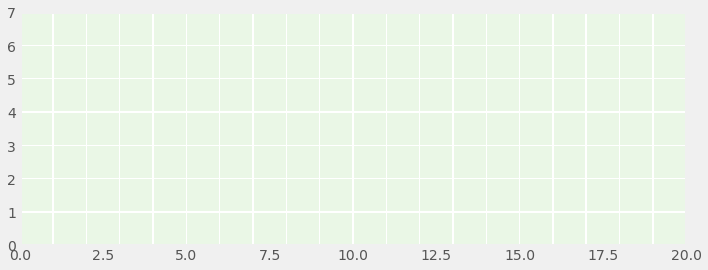

In [293]:
Weekday, Week = np.mgrid[:gh_df15.shape[0]+1, :gh_df15.shape[1]+1]
fig, ax = pl.subplots(figsize=(12, 4))
ax.set_aspect("equal")
pl.pcolormesh(Week, Weekday, gh_df15.values, cmap="Greens", edgecolor="w", vmin=-10, vmax=100)
pl.xlim(0, gh_df15.shape[1])


In [266]:
df.head(5)

,activity,week,weekday
0,86,23,4
1,61,15,5
2,69,13,0
3,87,21,3
4,43,5,3


In [271]:
df.week.nunique()

38

(0, 38)

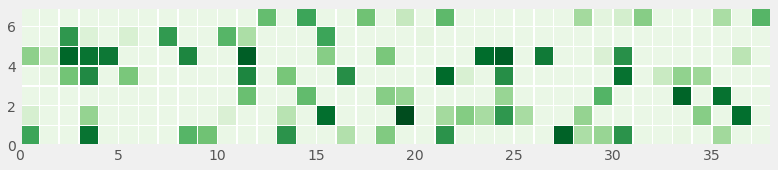

In [154]:
import pylab as pl
import numpy as np


# prepare some random data
N = 100
np.random.seed(0)
weekday = np.random.randint(0, 7, N)
week = np.random.randint(0, 40, N)
activity = np.random.randint(0, 100, N)

df = pd.DataFrame({"weekday":weekday, "week":week, "activity":activity})
df.drop_duplicates(subset=["weekday", "week"], inplace=True)

# reshape the data and plot it
df2 = df.pivot(columns="week", index="weekday", values="activity")
df2.fillna(0, inplace=True)

Weekday, Week = np.mgrid[:df2.shape[0]+1, :df2.shape[1]+1]
fig, ax = pl.subplots(figsize=(12, 4))
ax.set_aspect("equal")
pl.pcolormesh(Week, Weekday, df2.values, cmap="Greens", edgecolor="w", vmin=-10, vmax=100)
pl.xlim(0, df2.shape[1])

In [171]:
df.head()

,activity,week,weekday
0,86,23,4
1,61,15,5
2,69,13,0
3,87,21,3
4,43,5,3


In [160]:
bike_crash.REPORTDATE

195      2016-08-30 15:21:37
197      2016-09-07 01:36:43
202      2016-10-19 13:35:36
211      2016-12-17 10:47:15
212      2016-12-30 04:21:35
228      2017-05-01 16:55:42
259      2017-05-17 17:57:03
320      2017-05-08 03:12:14
426      2016-01-09 13:57:38
613      2016-09-16 21:16:33
951      2016-02-22 23:04:48
968      2015-11-28 11:39:14
1044     2016-10-28 22:06:17
1069     2016-04-27 12:56:02
1070     2016-03-16 22:49:49
1111     2016-05-31 01:31:04
1121     2016-03-27 22:12:01
1127     2015-09-30 19:42:33
1385     2017-04-26 07:52:39
1548     2017-05-15 00:35:38
2126     2017-05-18 00:19:10
2232     2016-11-03 22:09:58
2456     2016-10-20 14:48:17
2500     2016-10-18 23:21:41
2781     2016-11-24 03:55:26
2948     2017-05-31 00:37:11
2991     2016-05-25 15:44:32
3026     2017-04-21 15:55:10
3049     2015-10-23 05:40:56
3268     2017-03-09 02:47:14
                 ...        
129397   2016-08-24 01:41:22
130236   2016-10-13 00:29:24
130456   2016-03-11 02:54:04
130482   2016-

In [162]:
bike_crash.REPORTDATE.ix[195].isocalendar()[1]

35

In [168]:
bike_crash.groupby([bike_crash.WEEK])['REPORTDATE'].count()

WEEK
1      7
2      9
3      3
4     11
5      9
6     10
7     12
8     14
9     12
10    12
11     6
12    16
13    16
14    10
15    15
16    24
17    26
18    25
19    18
20    30
21    22
22    20
23    18
24    10
25    17
26     9
27     9
28     8
29    14
30     8
31    14
32    15
33    14
34    13
35    17
36    24
37    31
38    23
39    12
40    23
41    18
42    28
43    21
44    18
45    24
46    15
47    18
48    11
49    16
50    11
51     2
52    11
53     2
Name: REPORTDATE, dtype: int64

In [172]:
bike_crash.groupby(bike_crash['REPORTDATE'].day)

AttributeError: 'Series' object has no attribute 'day'

In [186]:
bike_crash.set_index('REPORTDATE')[bike_columns].groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').count().sum(axis=1)

REPORTDATE
2011-06-04    4
2011-06-05    0
2011-06-06    0
2011-06-07    0
2011-06-08    0
2011-06-09    0
2011-06-10    0
2011-06-11    0
2011-06-12    0
2011-06-13    0
2011-06-14    0
2011-06-15    0
2011-06-16    0
2011-06-17    0
2011-06-18    0
2011-06-19    0
2011-06-20    0
2011-06-21    0
2011-06-22    0
2011-06-23    0
2011-06-24    0
2011-06-25    0
2011-06-26    0
2011-06-27    0
2011-06-28    4
2011-06-29    0
2011-06-30    0
2011-07-01    0
2011-07-02    0
2011-07-03    0
             ..
2017-08-15    0
2017-08-16    0
2017-08-17    8
2017-08-18    0
2017-08-19    0
2017-08-20    0
2017-08-21    0
2017-08-22    0
2017-08-23    0
2017-08-24    0
2017-08-25    0
2017-08-26    0
2017-08-27    0
2017-08-28    0
2017-08-29    4
2017-08-30    0
2017-08-31    0
2017-09-01    0
2017-09-02    0
2017-09-03    0
2017-09-04    0
2017-09-05    4
2017-09-06    0
2017-09-07    0
2017-09-08    0
2017-09-09    0
2017-09-10    0
2017-09-11    0
2017-09-12    4
2017-09-13    4
Freq: D, dtyp

In [ ]:
bike_crash.REPORTDATE.groupby

In [157]:
df.pivot(columns="week", index="weekday", values="activity")

week,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,38,39
weekday,,,,,,,,,,,,,,,,,,,,,
0,61.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,53.0,46.0,...,27.0,34.0,69.0,1.0,NaN,2.0,NaN,31.0,NaN,NaN
1,11.0,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,NaN,NaN,NaN,NaN,NaN,39.0,NaN,85.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54.0,NaN,NaN,NaN,89.0,NaN,84.0,NaN,NaN
3,NaN,3.0,45.0,73.0,NaN,43.0,2.0,NaN,NaN,NaN,...,NaN,NaN,84.0,NaN,17.0,36.0,32.0,NaN,NaN,NaN
4,37.0,17.0,88.0,83.0,81.0,NaN,NaN,NaN,75.0,NaN,...,NaN,9.0,70.0,NaN,NaN,NaN,NaN,NaN,22.0,NaN
5,NaN,NaN,67.0,8.0,NaN,10.0,NaN,66.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,5.0,12.0,39.0,NaN,NaN,NaN,28.0,NaN,53.0
